<a href="https://colab.research.google.com/github/kebreck/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_3_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

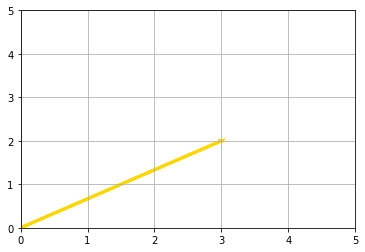

In [5]:
yellow = [3, 2]

fig, ax = plt.subplots()
ax.grid()
plt.xlim(0,5)
plt.ylim(0,5)

plt.arrow(0, 0, 
          yellow[0], 
          yellow[1], 
          head_width=.02, 
          head_length=0.02,
          linewidth=3,
          color = 'gold')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [6]:
g = np.array([17,-4,-2,1])
norm_g = np.linalg.norm(g)
print(g, "\n Norm of g:", norm_g)

[17 -4 -2  1] 
 Norm of g: 17.60681686165901


The Norm is the square root of the sum of the squared elements of a vector, and represents the length of the vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [7]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

print("Dot Product:", np.dot(c,d))

Dot Product: 42


No - if they were orthognal their dot product would be zero

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
import pandas as pd

In [13]:
# Transposition of E

E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
pd.DataFrame(E.T)

,0,1,2
0,7,1,2
1,4,3,6
2,2,-1,-4


In [14]:
#Inverse of E

E_inverse = np.linalg.inv(E)
pd.DataFrame(E_inverse)

,0,1,2
0,0.176471,-0.823529,0.294118
1,-0.058824,0.941176,-0.264706
2,0.000000,1.000000,-0.500000


## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [17]:
H = np.array([[2,-2,5],[4,1,10],[12,6,30]])
np.linalg.det(H)
# print(H)

0.0

A determinant of zero means there is no unique solution to a system of equations

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [0]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

In [21]:
#MEAN

total1 = sum(customers)
mean_customers = total1/len(customers)

total2 = sum(snow)
mean_snow = total2/len(snow)

print("mean customers: ", mean_customers)
print("mean snow: ", mean_snow)

mean customers:  1135.7142857142858
mean snow:  2.7142857142857144


In [26]:
# VARIANCE OF CUSTOMERS
def subtract_mean(number):
    return number-mean_customers

lambda x: x-mean_customers

<function __main__.<lambda>>

In [0]:
distances = list(map(subtract_mean, customers))

In [0]:
squared_distances = list(map(lambda x: x**2, distances))

In [0]:
list_length=len(squared_distances)-1 # for a sample taken from a population

In [35]:
variance_customers = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_customers,3))

98761.90


In [34]:
# VARIANCE OF SNOW
def subtract_mean_2(number):
    return number-mean_snow

lambda x: x-mean_snow

distances_2 = list(map(subtract_mean, snow))

squared_distances_2 = list(map(lambda x: x**2, distances_2))

list_length_2 = len(squared_distances_2)-1

variance_snow = sum(squared_distances_2) / list_length_2
print('{:.2f}'.format(variance_snow,3))

1497645.74


In [36]:
# Standard Deviations

print('{:.2f}'.format(np.sqrt(variance_customers)))

print('{:.2f}'.format(np.sqrt(variance_snow)))

314.26
1223.78


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, they are not comparable because there is no logic to suggest a similar distribution for these variables

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [45]:
df = pd.DataFrame({"customers": customers})

df['snow'] = pd.Series(snow)
print('{:.2f}'.format(df.cov().values[0][1]))

670.24


In [46]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


In [47]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


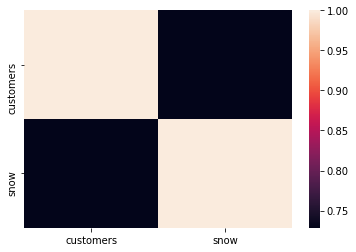

In [49]:
import seaborn as sns
sns.heatmap(df.corr())

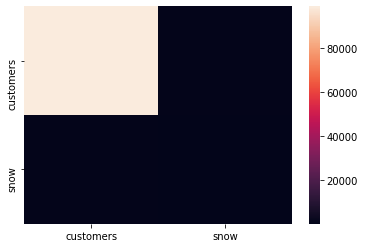

In [50]:
sns.heatmap(df.cov())

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [85]:
# Let me get you some data to start you off.
import pandas as pd

# BAND AID..... [1,2,3,4] = ["England","Wales","Scotland","North Ireland"]

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

grocery = pd.DataFrame(data)

# Look at the data
grocery.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [123]:
sklearn.preprocessing.StandardScaler(grocery, with_mean=True, with_std=True)

StandardScaler(copy=   Country  Cheese  Carcass_Meat  ...  Soft_Drinks  Alcoholic Drinks  Confectionery
0        0     105           245  ...         1374               375             54
1        3     103           227  ...         1256               475             64
2        2     103           242  ...         1572               458             62
3        1      66           267  ...         1506               135             41

[4 rows x 18 columns],
               with_mean=True, with_std=True)

In [124]:
cat_cols = grocery.columns[grocery.dtypes=='object']
num_cols = grocery.columns[grocery.dtypes!='object']

cat_cols

Index([], dtype='object')

In [125]:
grocery[cat_cols] = grocery[cat_cols].astype('category')

ValueError: ignored

In [0]:
for col in cat_cols:
    grocery[col] = grocery[col].cat.codes

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [129]:
pca.fit(grocery)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [130]:
word_vecs_2d = pca.transform(grocery)
len(word_vecs_2d)

4

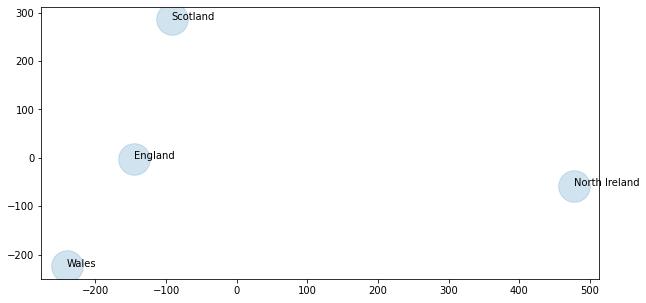

In [131]:
plt.figure(figsize=(10,5))

plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1], s=1000, alpha=.2)

for word, coord in zip(countries, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=10)
    
plt.show()

In [0]:
def scree_plot(pca):

    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

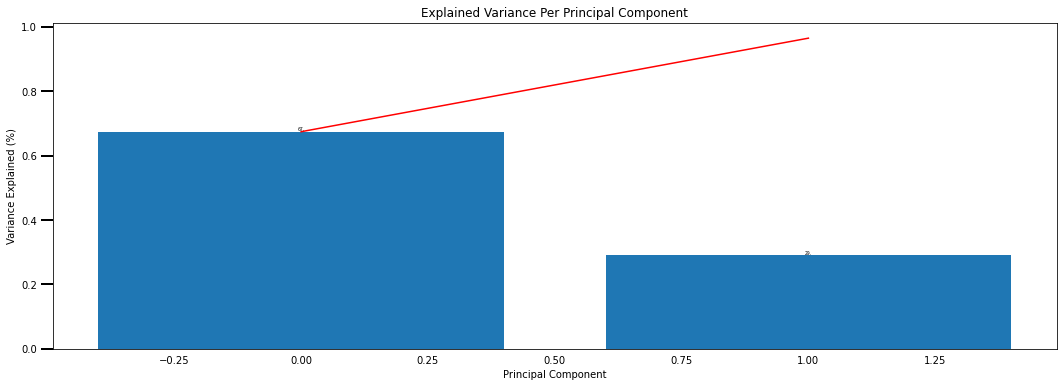

In [137]:
scree_plot(pca)

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

An eigenvector is a vector pointing in a direction in which it is scaled by a number, which is called the eigenvalue

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [75]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=4)

In [108]:
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
labels = kmeans.labels_
print(labels)

[3 0 0 3 0 0 3 3 1 0 0 0 0 0 3 0 3 0 0 2 3 2 2 2 0 0 0 1 0 0 0 0 0 2 0 0 0
 0 1 0 0 2 1 1 1 0 0 0 3 0 2 3 3 1 2 0 0 1 1 3 2 0 3 1 2 1 2 1 3 1 0 0 0 0
 2 2 0 0 1 2 1 0 0 0 1 0 1 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 3 0 0 2 3 3 3 2 0
 2 0 3 0 0 1 1 2 1 2 0 0 3 0 3 0 2 1 3 0 3 0 3 1 1 0 2 3 0 1 0 0 2 0 1 0 1
 3 0 0 0 3 2 0 1 0 2 0 3 0 0 1 3 2 2 0 1 0 0 3 0 1 2 0 0 0 0 0 3 0 0 0 0 0
 0 3 2 1 0 0 3 2 3 0 1 2 2 0 0]


In [110]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values
points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


In [0]:
def get_centroids(df, column_header):
    new_centroids = df.groupby(column_header).mean()
    return new_centroids

In [0]:
def plot_clusters(dfpoints, column_header, centroids):
    colors = {0:'red', 1:'blue', 2:'gold', 3:'green'}
    fig, ax = plt.subplots()
    ax.plot(centroids.loc[:3, 'x'], centroids.loc[:3, 'y'], "ok")
    grouped = dfpoints.groupby(column_header)
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()

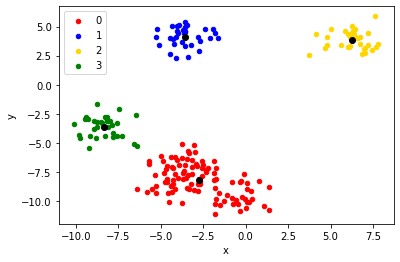

In [115]:
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)

In [0]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

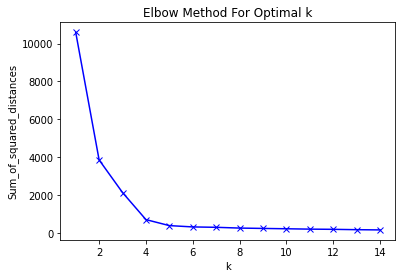

In [117]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).